In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from umap import UMAP
import seaborn as sns
sns.set()

# 加载手写数字数据集
digits = load_digits()
data = digits.data
labels = digits.target


/home/zhangmanman/anaconda3/envs/RL_ENV/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [23]:
labels.size

1797

In [12]:
data.shape

(1797, 64)

In [34]:
sort_data = np.c_[data,labels.reshape(1797,1)]
np.unique(sort_data[:,-1])

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [39]:
sort_data = sort_data[sort_data[:,-1].argsort()]
sort_data

array([[0., 0., 5., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 2., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 1., 0., 9.],
       [0., 0., 6., ..., 0., 0., 9.],
       [0., 0., 0., ..., 0., 0., 9.]])

In [53]:
X = sort_data[:,:-1]
Y = sort_data[:,-1]
Y.shape,X.shape

((1797,), (1797, 64))

In [54]:

# 使用 UMAP 进行降维
umap = UMAP(n_components=2)
data_umap = umap.fit_transform(X)

In [55]:
data_umap.shape

(1797, 2)

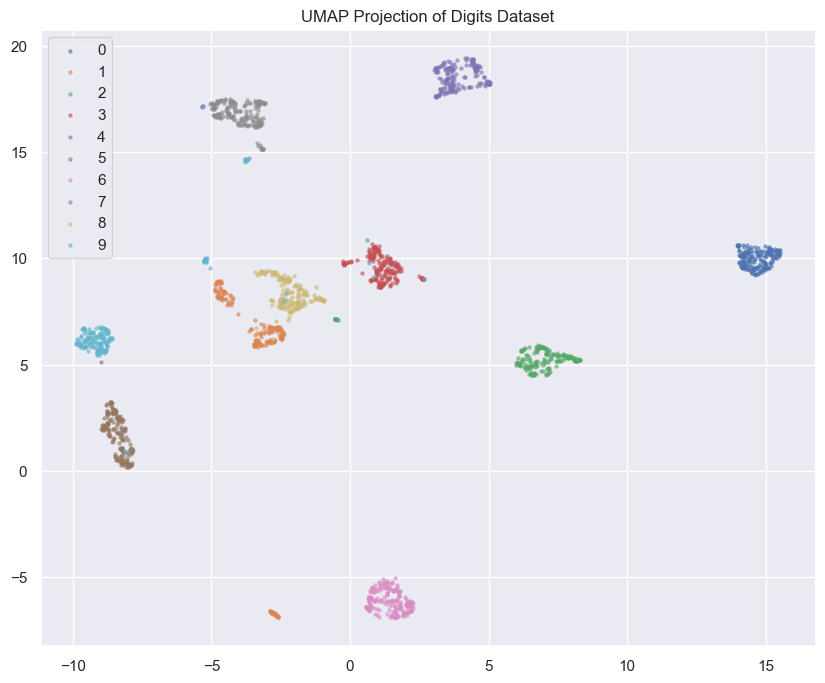

In [63]:
# 绘制降维后的数据
plt.figure(figsize=(10, 8))
for i in range(10):
    plt.scatter(data_umap[Y == i, 0], data_umap[Y == i, 1], label=str(i), s=5,alpha=0.5)
plt.title("UMAP Projection of Digits Dataset")
plt.legend()
plt.show()

## 聚类测试

In [90]:
from sklearn.cluster import KMeans
from numpy import unique
from numpy import where
from matplotlib import pyplot
# 定义模型
model = KMeans(n_clusters=10)
# 模型拟合
model.fit(data_umap)
# 为每个示例分配一个集群
yhat = model.predict(data_umap)

yhat

/home/zhangmanman/anaconda3/envs/RL_ENV/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, ..., 4, 4, 8], dtype=int32)

In [91]:
{ i : Y == i for i in range(10)}

{0: array([ True,  True,  True, ..., False, False, False]),
 1: array([False, False, False, ..., False, False, False]),
 2: array([False, False, False, ..., False, False, False]),
 3: array([False, False, False, ..., False, False, False]),
 4: array([False, False, False, ..., False, False, False]),
 5: array([False, False, False, ..., False, False, False]),
 6: array([False, False, False, ..., False, False, False]),
 7: array([False, False, False, ..., False, False, False]),
 8: array([False, False, False, ..., False, False, False]),
 9: array([False, False, False, ...,  True,  True,  True])}

In [92]:
(yhat == Y).sum()/Y.size

0.01669449081803005

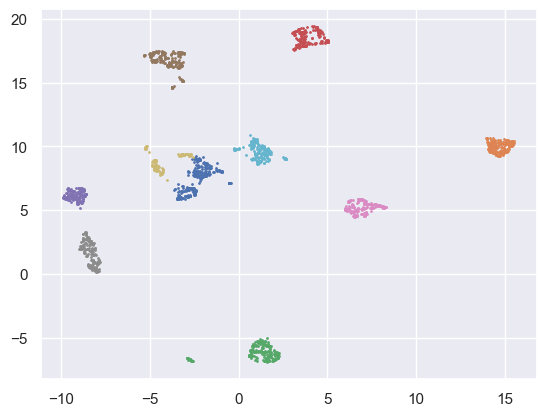

In [95]:
clusters = unique(yhat)
# 为每个群集的样本创建散点图
for cluster in clusters:
# 获取此群集的示例的行索引
    row_ix = where(yhat == cluster)
# 创建这些样本的散布
    pyplot.scatter(data_umap[row_ix, 0], data_umap[row_ix, 1],s=1)
# 绘制散点图
pyplot.show()

In [107]:
import numpy as np
from sklearn import metrics
from scipy.optimize import linear_sum_assignment


def acc(y_true, y_pred):
    """
    Calculate clustering accuracy. Require scikit-learn installed
    # Arguments
        y: true labels, numpy.array with shape `(n_samples,)`
        y_pred: predicted labels, numpy.array with shape `(n_samples,)`
    # Return
        accuracy, in [0,1]
    """
    y_true = y_true.astype(np.int64)
    assert y_pred.size == y_true.size
    D = max(y_pred.max(), y_true.max()) + 1
    w = np.zeros((D, D))#, dtype=np.int64)
    for i in range(y_pred.size):
        w[y_pred[i], y_true[i]] += 1
    # from sklearn.utils.linear_assignment_ import linear_assignment
    # ind = linear_assignment(w.max() - w)
    # return sum([w[i, j] for i, j in ind]) * 1.0 / y_pred.size
    row_ind,col_ind = linear_sum_assignment(cost_matrix)
    return row_ind,col_ind



if __name__ == '__main__':
    # A为真实值、B,C,D为等效果的预测值 即: func(A,B)=func(A,C); func(B,D)=func(C,D);
    A = np.array([1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3])
    B = np.array([1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 1, 1, 3, 3, 3])
    C = np.array([2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 3, 2, 2, 3, 3, 3])  # 将B中的 1 与 2 互换
    D = np.array([1, 3, 1, 1, 1, 1, 1, 3, 3, 3, 3, 2, 1, 1, 2, 2, 2])  # 将B中的 2 与 3 互换

    # 测试
    print(acc(A, B))  # 0.7058823529411765
    print(acc(A, C))  # 0.7058823529411765
    print(metrics.accuracy_score(A, B))  # 0.7058823529411765
    print(acc(B, D))  # 1.0
    print(acc(C, D))  # 1.0


(array([0, 1, 2]), array([0, 1, 2]))
(array([0, 1, 2]), array([0, 1, 2]))
0.7058823529411765
(array([0, 1, 2]), array([0, 1, 2]))
(array([0, 1, 2]), array([0, 1, 2]))


In [108]:
acc(yhat,Y)

TypeError: 'numpy.float64' object cannot be interpreted as an integer